In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("xy_data/Ductility_composition.csv")
print("Shape of the dataset is: ", data.shape)
data.head()

Shape of the dataset is:  (238, 102)


,TestTempC,H,He,Li,Be,B,N,O,F,Ne,...,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,Ductility (%)
0,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.70
1,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.51
2,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.83
3,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.94
4,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.00


In [3]:
print(data.shape)

# Function to detect and remove outliers for each column separately
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where the value in the column is an outlier
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Apply the function to remove outliers
df_cleaned = remove_outliers(data)
print(df_cleaned.shape)
df_cleaned.head()

(238, 102)
(131, 102)


,TestTempC,H,He,Li,Be,B,N,O,F,Ne,...,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,Ductility (%)
0,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.70
1,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.51
2,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.83
4,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.00
5,25.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.90


In [4]:
# Step 3: Prepare Features and Target
X = df_cleaned.drop('Ductility (%)', axis=1)
y = df_cleaned['Ductility (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("\nDuctility Model Evaluation:")
print(f"Training Data - R²: {r2_train:.3f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Data  - R²: {r2_test:.3f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")


Ductility Model Evaluation:
Training Data - R²: 0.905, MAE: 3.46, MSE: 34.75, RMSE: 5.89
Testing Data  - R²: 0.614, MAE: 8.31, MSE: 155.22, RMSE: 12.46


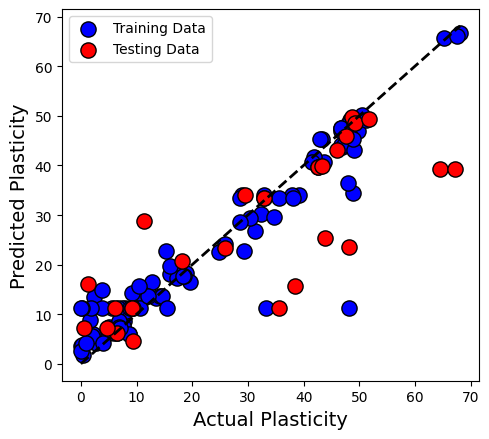

In [7]:
# Create a scatter plot to compare actual vs. predicted for both training and testing data
plt.figure(figsize=(5, 4.5))

# Plot training data
plt.scatter(y_train, y_train_pred, color='blue', alpha=1, label='Training Data', edgecolor='k', s=120)

# Plot testing data
plt.scatter(y_test, y_test_pred, color='red', alpha=1, label='Testing Data', edgecolor='k', s=120)

# Plot the ideal prediction line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'k--', lw=2)

# Customize the plot
plt.xlabel("Actual Plasticity", fontsize=14)
plt.ylabel("Predicted Plasticity", fontsize=14)

plt.legend()
plt.tight_layout()

plt.savefig("figures/rf_model_ductility_actual_vs_predicted_composition_input.png", dpi=500, bbox_inches='tight')
plt.show()

In [8]:
# Import regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, 
    HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor
)
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
    ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# Extended list of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(random_state=42),
    "RANSAC Regressor": RANSACRegressor(random_state=42),
    "TheilSen Regressor": TheilSenRegressor(random_state=42),
    "PLS Regression": PLSRegression(n_components=2),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

In [10]:
def evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test):
    """
    Train and evaluate multiple regression models and visualize actual vs predicted values
    with R² scores displayed in subplots. Also includes training and testing MAE, MSE, RMSE.

    Parameters:
    - models: Dictionary of regression model names and their corresponding instances.
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Testing data and labels.

    Returns:
    - DataFrame with model evaluation metrics.
    """
    results = []
    n_models = len(models)
    n_cols = 3  # Number of subplots per row
    n_rows = int(np.ceil(n_models / n_cols))  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for idx, (name, model) in enumerate(models.items()):
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate the model
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Training metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        # Testing metrics
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        # Store results
        results.append({
            "Model": name,
            "Train MAE": train_mae,
            "Train R²": train_r2,
            
            "Test MAE": test_mae,
            "Test R²": test_r2,
            
            "Train MSE": train_mse,
            "Train RMSE": train_rmse,
            "Test MSE": test_mse,
            "Test RMSE": test_rmse,
        })

        # Plot Actual vs Predicted in the subplot
        ax = axes[idx]
        ax.scatter(y_train, y_train_pred, color="blue", alpha=1, label="Training Data", edgecolor="k")
        ax.scatter(y_test, y_test_pred, color="red", alpha=1, label="Testing Data", edgecolor="k")
        ax.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
                "k--", lw=1)
        ax.set_title(f"{name}\nTrain R²: {train_r2:.3f} | Test R²: {test_r2:.3f}", fontsize=10)
        ax.set_xlabel("Actual Plasticity")
        ax.set_ylabel("Predicted Plasticity")
        ax.legend()

    # Turn off unused subplots
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Return results as a sorted DataFrame for better analysis
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Test R²", ascending=False)

    return results_df

c:\Users\Tohid\anaconda3\envs\regression\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tohid\anaconda3\envs\regression\lib\site-packages\sklearn\linear_model\_theil_sen.py:128: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn(


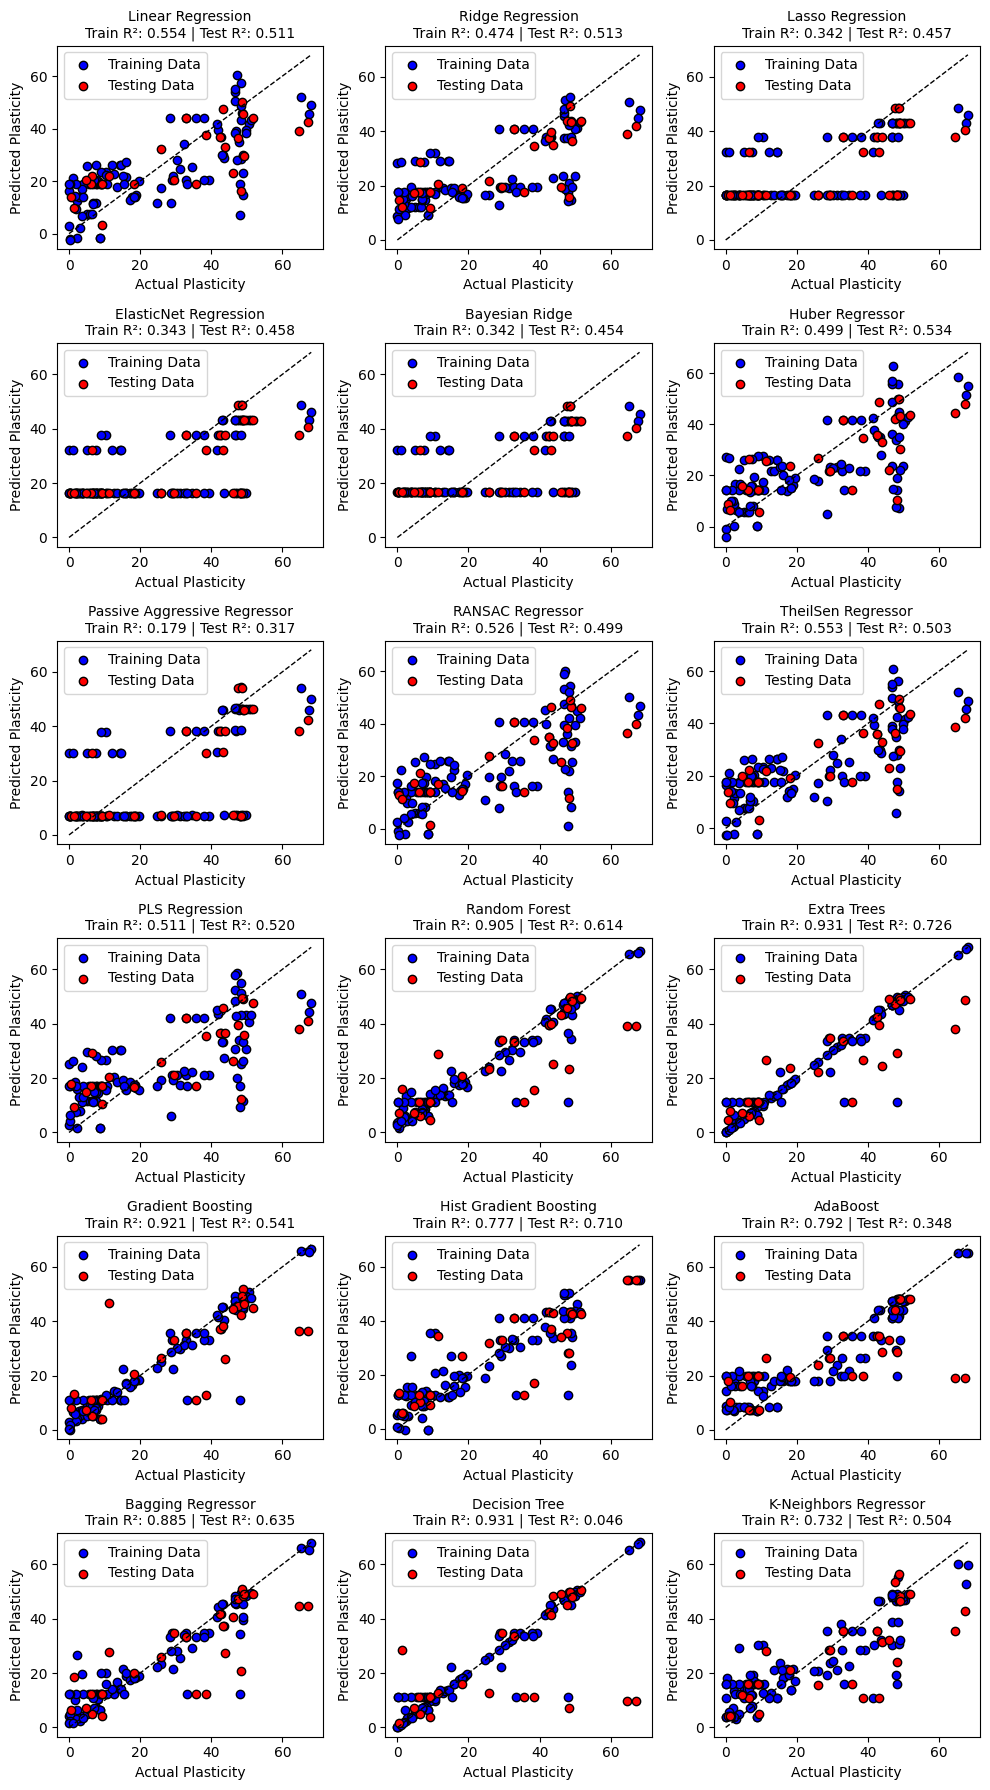

In [11]:
# Evaluate and visualize all models
results_df = evaluate_and_visualize_models(models, X_train, y_train, X_test, y_test)

In [12]:
results_df = results_df.round(3)
results_df.to_csv("results/ductility_composition_results.csv", index=False)
results_df

,Model,Train MAE,Train R²,Test MAE,Test R²,Train MSE,Train RMSE,Test MSE,Test RMSE
11,Extra Trees,1.908,0.931,7.016,0.726,25.176,5.018,110.360,10.505
13,Hist Gradient Boosting,6.526,0.777,8.590,0.710,81.697,9.039,116.930,10.813
15,Bagging Regressor,3.792,0.885,8.253,0.635,42.232,6.499,146.982,12.124
10,Random Forest,3.463,0.905,8.307,0.614,34.746,5.895,155.220,12.459
12,Gradient Boosting,3.022,0.921,8.923,0.541,29.017,5.387,184.936,13.599
5,Huber Regressor,10.570,0.499,10.830,0.534,183.422,13.543,187.815,13.705
9,PLS Regression,10.839,0.511,10.592,0.520,179.206,13.387,193.262,13.902
1,Ridge Regression,11.382,0.474,11.228,0.513,192.774,13.884,196.116,14.004
0,Linear Regression,10.641,0.554,11.666,0.511,163.212,12.775,197.067,14.038
17,K-Neighbors Regressor,7.364,0.732,10.678,0.504,98.037,9.901,199.788,14.135



Extra Trees Model Evaluation:
Training Data - R²: 0.931, MAE: 1.91, MSE: 25.18, RMSE: 5.02
Testing Data  - R²: 0.726, MAE: 7.02, MSE: 110.36, RMSE: 10.51


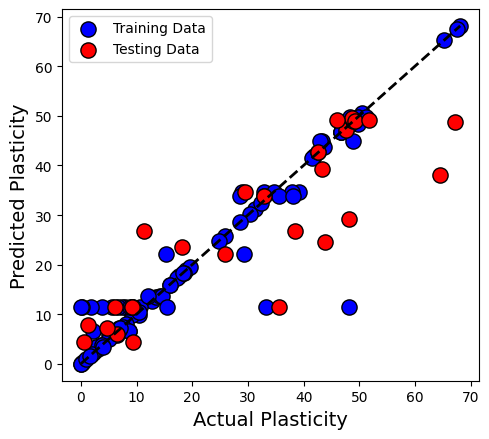

In [13]:
# Initialize and train the Extra Trees model
et_model = ExtraTreesRegressor(random_state=42)  # You can adjust n_estimators
et_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_et = et_model.predict(X_train)
y_test_pred_et = et_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred_et)
mse_train = mean_squared_error(y_train, y_train_pred_et)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_et)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_et)

# Print evaluation metrics
print("\nExtra Trees Model Evaluation:")
print(f"Training Data - R²: {r2_train:.3f}, MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Data  - R²: {r2_test:.3f}, MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")

# Plot Actual vs. Predicted Values
plt.figure(figsize=(5, 4.5))

# Training data
plt.scatter(y_train, y_train_pred_et, color='blue', label='Training Data', edgecolor='k', s=120)

# Testing data
plt.scatter(y_test, y_test_pred_et, color='red', label='Testing Data', edgecolor='k', s=120)

# Ideal Line
min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

# Customize the plot
plt.xlabel("Actual Plasticity", fontsize=14)
plt.ylabel("Predicted Plasticity", fontsize=14)

plt.legend()
plt.tight_layout()

plt.savefig("figures/et_model_ductility_actual_vs_predicted_composition_input.png", dpi=500, bbox_inches='tight')
plt.show()